# Aula 20 - Estatística pt5 - Estatística Inferencial pt3 - testes de hipóteses

Na aula de hoje, vamos explorar os seguintes tópicos:

- 1) Testes de Hipóteses
- 2) Teste bicaudal vs unicaudal
- 3) Teste t de Student
- 4) Alguns outros exemplos
- 5) Correlação
_____________

### Problema gerador: qual o caminho mais rápido de Santo André até a Faria Lima usando transporte público?

Imagine que você mora na região do ABC paulista (digamos, próximo à estação Santo André), e trabalha próximo à estação Faria Lima, em São Paulo.

Existem duas opções de trajeto:

> Santo André >> Tamanduateí >> **TROCA DE LINHA** >> Tamanduateí >> Consolação >> **TROCA DE LINHA** >> Paulista >> Faria Lima

> Santo André >> Brás >> **TROCA DE LINHA** >> Brás >> Luz >> **TROCA DE LINHA** >> Luz >> Faria Lima

Naturalmente, existem variações de tempo total de viagem (vocẽ pode dar sorte ou azar durante as transferências, pode ocorrer atrasos naturais da operação, etc.), de modo que o tempo de viagem pode ser tratado como uma **variável aleatória**.

Você, que faz esse caminho diariamente, deseja saber **qual é o trajeto mais rápido**, pra que você possa economizar alguns minutos valiosos de transporte público!

<img src="https://www.metrocptm.com.br/wp-content/uploads/2018/09/mapa-da-rede-metro-1018-abre.jpg">

____
____
____

Claro, já conhecemos o suficiente de estatística pra saber que não podemos tirar qualquer conclusão significativa com base em duas únicas viagens, certo?

Para responder à pergunta do problema gerador de maneira estatisticamente embasada, você elabora o seguinte experimento (isso é, procedimento para **a coleta de dados (amostra)**):

- Durante 60 dias, você faz o caminho (de ida, apenas), alternando entre um caminho e outro;
- Você anota o tempo de viagem, começando a partir do momento que você embarca em Santo André, e terminando quando você desembarca na Faria Lima;
- Você faz o trajeto aproximadamente no mesmo horário todos os dias.

Vamos ler estes dados:

In [ ]:
import numpy as np
import pandas as pd

import scipy

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("sa_fl_tempos.csv")

In [ ]:
df

,dia,tempo,caminho
0,seg,58,luz
1,ter,55,tamanduateí
2,qua,55,luz
3,qui,62,tamanduateí
4,sex,58,luz
5,seg,57,tamanduateí
6,ter,62,luz
7,qua,54,tamanduateí
8,qui,55,luz
9,sex,59,tamanduateí


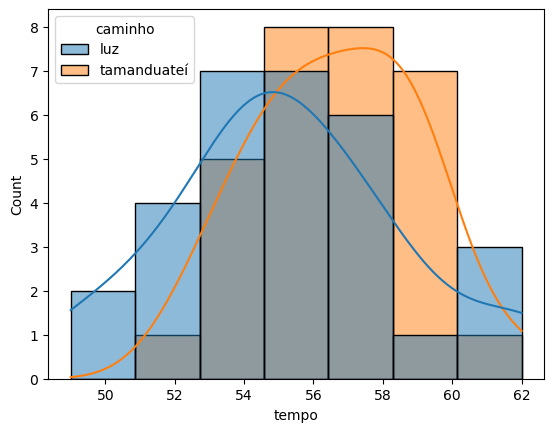

In [ ]:
sns.histplot(data=df, x="tempo", kde=True, hue="caminho");

In [ ]:
df.groupby(["caminho"])[["tempo"]].describe()

tempo                                                    
            count       mean       std   min   25%   50%    75%   max
caminho                                                              
luz          30.0  55.266667  3.393029  49.0  54.0  55.0  57.00  62.0
tamanduateí  30.0  56.700000  2.409035  52.0  55.0  57.0  58.75  62.0

Aparentemente, o caminho peça luz é mais rápido. Mas, podemos afirmar isso **com confiança**?

Mais precisamente,

> Podemos dizer que o tempo médio de viagem pela luz é menor que por tamanduateí?

Para isso, faremos um teste de hipóteses!

______

## 1) Testes de Hipóteses

Antes de tirarmos alguma conclusão com base nestes dados que coletamos, note que há **duas HIPÓTESES** possíveis (e opostas!) pra explicar o que foi observado:

> **$H_0$: Não existe diferença entre os tempos (tanto faz ir por um ou outro caminho)**
Em média, tempo total de viagem por um ou outro caminho é muito similar, tanto faz ir por um ou por outro.
A **diferença observada** entre as médias ocorreu como fruto do acaso, isto é, apenas devido a ruídos da amostragem, ou seja, uma variação natural esperada.

Chamamos a hipótese acima de **Hipótese nula** (Null hypothesis, H-null).

Esssa sempre será a hipótese **do status quo**, ou seja: *Não há diferença*, *tanto faz*, *as proporções são iguais*, *as médias são iguais*, etc. **Matematicamente: EXPRESSÕES DE IGUALDADE (=)**.

> **$H_1$: Existe diferença entre os tempos de viagem!**
Existe uma diferença considerável entre o tempo total médio de viagem por um ou outro caminho.
Portanto, **existe sim discriminação de gênero**.
E, de fato, a **diferença observada** entre as médias **NÃO** ocorreu apenas devido a ruídos da amostrage.

Chamamos a hipótese acima de **Hipótese alternativa** (Alternative hypothesis, H-1). Essa é a hipótese **interessante**, e representa a nossa pergunta inicial, ou seja, o porquê de estarmos fazendo o experimento estatístico. **Matematicamente: EXPRESSÕES DE DESIGUALDADE (>, <, !=)**.

Temos as duas hipóteses acima. Agora, como decidimos a favor de uma ou outra?

**FAZEMOS UM TESTE DE HIPÓTESE!**

O **teste de hipótese** consiste em **determinar qual seria a chance de ocorrer o resultado observado OU um resultado ainda mais exrtremo DADO QUE a hipótese nula é verdadeira**.

Em termos matemáticos, nosso teste de hipótese é:

> $H_0: \  \mu_{L} =  \mu_{T}$
>
> $H_1: \  \mu_{L} \neq  \mu_{T}$

Que pode ser reescrito como:

> $H_0: \  \mu_{L} -  \mu_{T} = 0$
>
> $H_1: \  \mu_{L} -  \mu_{T} \neq 0$

No geral,

> $H_0: \  \mu_{L} -  \mu_{T} = \mu_0$
>
> $H_1: \  \mu_{L} -  \mu_{T} \neq \mu_0$

Onde $\mu_{L}$ e $\mu_T$ são os tempos médios de viagem indo pela Luz e por Tamanduateí; e $\mu_0 = 0$ é a chamada **média nula**, que assumimos ser verdadeira para a realização do teste de hipótese.

Vamos calcular a real diferença amostral entre as médias

In [ ]:
df.groupby(["caminho"])[["tempo"]].mean()

,tempo
caminho,
luz,55.266667
tamanduateí,56.700000


In [ ]:
df.groupby(["caminho"])[["tempo"]].mean().values.squeeze()

array([55.26666667, 56.7       ])

In [ ]:
mu_L, mu_T = df.groupby(["caminho"])[["tempo"]].mean().values.squeeze()

mu_L, mu_T

(55.266666666666666, 56.7)

In [ ]:
mu_L - mu_T

-1.4333333333333371

Agora, fazemos a pergunta: **assumindo que não há diferença entre as médias (a nível populacional), qual é a chance de ter encontrado a diferença observada (na amostra) de $\Delta{\mu} = -1.43$?**

Para isso, checamos que são válidas as condições para o TCL aplicado a **diferenças de médias**:

> A diferença entre duas médias, $\hat{\mu}_L - \hat{\mu}_T$ pode ser modelada como uma distribuição normal se:
- Ambas as amostras são aleatórias e independentes entre si;
- A condição $n>30$ é válida para ambos os grupos separadamente.

Neste caso, o erro padrão da estimativa será dado por:

$$SE = \sqrt{\frac{\sigma_1^2}{n_1} + \frac{ \sigma_2^2}{n_2}}$$

> Note que, uma premissa adicional para fazermos o que vamos fazer a seguir é que **conhecemos** os desvios-padrão populacionais $\sigma_1$ e $\sigma_2$. Na realidade, esse não é o nosso caso, então começaremos com uma aproximação, e depois veremos qual a forma mais correta de resolver esse problema.

In [ ]:
std_L, std_T = df.groupby(["caminho"])[["tempo"]].std().values.squeeze()

std_L, std_T

(3.3930286880839833, 2.409034718691714)

In [ ]:
n_L, n_T = df.groupby(["caminho"])[["tempo"]].count().values.squeeze()

n_L, n_T

(30, 30)

In [ ]:
SE = np.sqrt((std_L**2/n_L) + (std_T**2/n_T))

SE

0.7597388137604261

Assumindo, então, que $H_0$ é verdadeira, temos que a distribuição da diferença de médias é **centrada em $\mu_0 = 0$**. Esse é o **parâmetro populacional!**

Sendo assim, nos perguntamos: **qual seria a chance de, ao acaso, a amostra que coletamos ter sido tal que $\hat{\mu}_L - \hat{\mu}_T = -1.43$**?

Para executar este cálculo, calculamos o chamado **score padrão (z-score)**, que é simplesmente dado por:

$$ Z = \frac{-1.43 - 0}{0.76} =  -1.89 $$

> Como vamos uzar o z-score como uma estatística cujo objetivo vai ser fornecer a resposta para um teste de hipótese, é comum chama-lo de uma **estatística de teste (*test statistics*)**.

In [ ]:
z_score = ((mu_L - mu_T) - 0)/SE

z_score

-1.8866132773168023

Isso quer dizer que **a nosso estimador pontual amostral $\hat{\mu}_L - \hat{\mu}_T = -1.43$ se encontra -1.89 desvios-padrão deslocados com relação à média da distribuição**.

É sempre instrutivo fazer um gráfico para esta situação.

Obs.: note que a distribuição de $Z$ terá **desvio padrão 1**, por construção! Isto é, $ Z \sim (0, 1) $

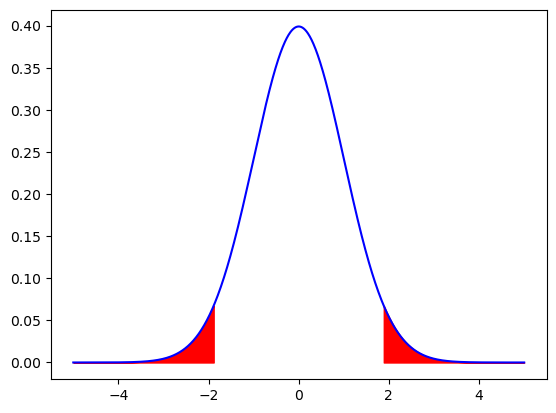

In [ ]:
mean=0
std=1

# range total da distribuição
x_min = -5
x_max = 5
x=np.linspace(x_min, x_max, 1000)
y=scipy.stats.norm.pdf(x)
plt.plot(x,y,'b')

# se z < 0
x=np.linspace(x_min, z_score, 1000)
y=scipy.stats.norm.pdf(x)
plt.fill_between(x, y,color='r')

# z > 0
x=np.linspace(-z_score, x_max, 1000)
y=scipy.stats.norm.pdf(x)
plt.fill_between(x, y,color='r')

plt.show()

O **p-value** é a **área vermelha**!

(Note como devemos considerar ambas as áreas!)

Para calcularmos o **p-value** podemos usar a SF para um valor positivo de z-score:

In [ ]:
scipy.stats.norm.sf(np.abs(z_score))*100*2

5.9212359625495905

Ou, então, com o z negativo (sinal natural):

In [ ]:
(scipy.stats.norm.cdf(z_score)*100)*2

5.9212359625495905

<img src="https://qph.cf2.quoracdn.net/main-qimg-2842f62c8c48670a3afc45e6cc4f0acd">

**E como interpretar o p-value?**

O p-value nada mais é que a **probabilidade** de termos observado a estatística de teste (z-score) na amostra, assumindo que a hipótese nula é verdadeira.

> Ou seja, assumindo que não há diferença entre os tempos médios (hipótese nula), a chance de encontrarmos um z-score de -1.89

**E qual a conclusão a que chegamos?**

Para isso, usamos um **nível de significância**, que em geral é tomado como $\alpha = 5\%$.

(Lembrando que a confiança é dada por $1-\alpha = 0.95$, neste caso)

Assim,

> Se p-value $< \alpha$: **rejeitamos $H_0$**: os dados apresentam evidência convincente **a favor de $H_1$**;

> Se p-value $> \alpha$: **falhamos em rejeitar $H_0$**: os dados NÃO apresentam evidência convincente **a favor de $H_1$**.



### Conclusão

Como obtivemos um p-value de 5.9%, que é maior que 5%, com 5% de significância (ou seja, 95% de confiança!), **não podemos rejeitar** a hipótese nula!

Ou seja, **os nossos dados não fornecem** evidências suficientemente fortes contra a hipótese nula/a favor da alternativa!

Assim, não podemos dizer que há de fato diferença significativa entre os tempos pelas duas rotas.

O  nível de significância é interpretado como a **probabilidade de ocorrência do erro do Tipo I (falso positivo)**, enquanto a confiança é a **probabilidade de inferência correta (falhar em rejeitar hipótese nula verdadeira**):

| - | $H_{0}$ é verdadeira | $H_{0}$ é falsa |
|-----------|----------------------|-----------------|
| Rejeitar $H_{0}$ | Erro tipo I ($\alpha$) | Sem erro |
| Não rejeitar $H_{0}$  | Sem erro ($1 - \alpha)$ | Erro tipo II |

Tomamos uma conclusão com base no p-value e no nível de significância desejado, o que pode fazer com que a conclusão mude!

> Isto é, o p-value só deve ser interpretado como uma conclusão de acordo ccom a significância/confiança desejada!

No entanto, quanto **menor o valor p**, maior é a evidência para a rejeição da hipótese nula.

Usualmente costuma-se avaliar o nível de significância de acordo com a tabela abaixo:

| Nível de significância | Decisão |
|------------------------|---------|
| $p < 0.01$ | Evidência muito forte contra $H_{0}$ |
| $0.01 < p < 0.05$ | Forte evidência contra $H_{0}$ |
| $0.05 < p < 0.1$ | Fraca evidência contra $H_{0}$ |
| $p > 0.1$ | Pouquíssima ou nenhuma evidência contra $H_{0}$ |

___________
___________
___________

## 2) Teste bicaudal vs unicaudal

Agora, poderíamos também mudar nossas hipóteses:

> $H_0: \  \mu_{L} \geq \mu_{T}$
>
> $H_1: \  \mu_{L} <  \mu_{T}$


Isto é,

> $H_0: \  \mu_{L} - \mu_{T} \geq 0$
>
> $H_1: \  \mu_{L} -  \mu_{T} < 0$

Nesse caso, precisamos fazer um **teste unicauldal**, pois estamos testando apenas "uma direção" de violação!

<img src="https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img002.png" weight=50%>

Fonte: [Caelum](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img002.png)

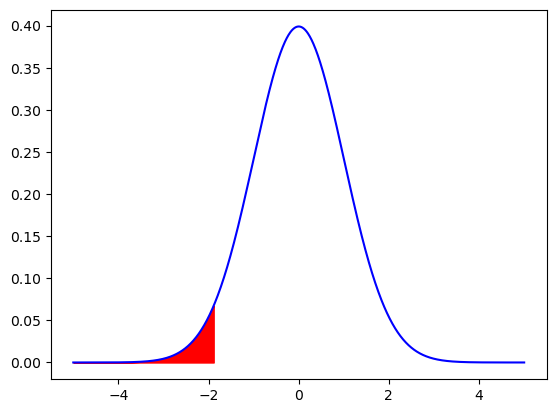

In [ ]:
mean=0
std=1

# range total da distribuição
x_min = -5
x_max = 5
x=np.linspace(x_min, x_max, 1000)
y=scipy.stats.norm.pdf(x)
plt.plot(x,y,'b')

# se z < 0
x=np.linspace(x_min, z_score, 1000)
y=scipy.stats.norm.pdf(x)
plt.fill_between(x, y,color='r')

plt.show()

In [ ]:
z_score

-1.8866132773168023

In [ ]:
scipy.stats.norm.sf(np.abs(z_score))*100

2.9606179812747953

In [ ]:
scipy.stats.norm.cdf(z_score)*100

2.9606179812747953

### Conclusão

Como obtivemos um p-value de 3%, que é menor que 5%, com 5% de significância (ou seja, 95% de confiança!), **podemos rejeitar** a hipótese nula!

Ou seja, **os nossos dados fornecem** evidências suficientemente fortes contra a hipótese nula/a favor da alternativa!

Assim, aceitamos a alternativa de que ir pela Luz é mais rápido que por Tamanduateí!

__________________

No geral, o framework de teste de hipótese é o seguinte:

> 1) Formule as hipóteses $H_0$ e $H_1$ em termos de um estimador pontual $PE$

$$H_0: PE (\leq, \geq, =) PE_0$$

$$H_1: PE (<, >, \neq) PE_0$$

> 2) Calcule o estimador pontual com base na amostra;

> 3) Cheque as condições para a aplicação do TCL;

> 4) Calcule alguma **estatística de teste**. Nos nossos exemplos, o **score padrão**:

$$ Z = \frac{PE - PE_0}{SE} $$

> 5) Calcule o p-value

> 6) Tome uma decisão:

- Se o p-value for MENOR que o nível de significância $\alpha$, **rejeitamos $H_0$**: os dados apresentam evidência convincente **a favor de $H_1$**;

- Se o p-value for MAIOR que o nível de significância $\alpha$, **falhamos em rejeita $H_0$**: os dados NÃO apresentam evidência convincente **a favor de $H_1$**;
    

___________
___________
___________

## 3) Teste t de Student

**O que muda se as condições para o TCL não forem válidas?**

Nesse caso, não podemos assumir que a distribuição amostral segue uma distribuição normal.

Assim, utilizar o **z-score** como estatística de teste não é justificável.

Nestes casos, precisamos usar outras distribuições:

> - Quando o tamanho da amostra tiver 30 elementos ou mais, deve-se utilizar a distribuição normal, como estabelecido pelo **TCL**.
> - Para um tamanho de amostra menor que 30 elementos, e se pudermos afirmar que a população se distribui aproximadamente como uma normal e o desvio padrão populacional for conhecido, deve-se utilizar a distribuição normal.
> - Para um tamanho de amostra menor que 30 elementos, e se pudermos afirmar que a população se distribui aproximadamente como uma normal e o desvio padrão populacional não for desconhecido, deve-se utilizar a distribuição t de Student.

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img003.png' width=70%>

Fonte: [Caelum](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img003.png)

### Student's t-distribution

A [distribuição t de Student](https://en.wikipedia.org/wiki/Student%27s_t-distribution) é uma distribuição simétrica e semelhante à curva normal padrão, porém com caudas mais largas, ou seja, uma simulação da t de Student pode **gerar valores mais extremos** que uma simulação da normal.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Student_t_pdf.svg/325px-Student_t_pdf.svg.png">

onde $\nu$ é o número de **graus de liberdade**, comumente tomado como $n-1$ para nossos objetivos.

Note que para $\nu \rightarrow \infty$, recuperamos a distribuição normal!

Vamos ver na prática, como o uso da distribuição t funciona:

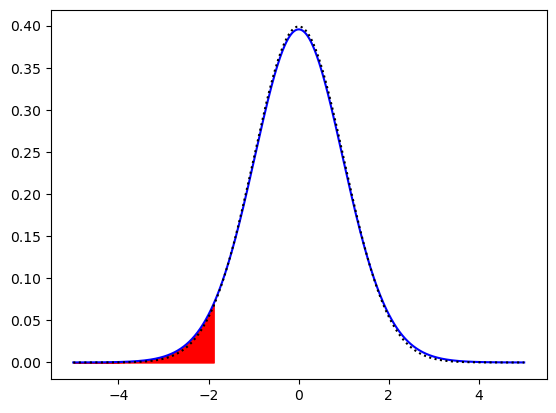

In [ ]:
mean=0
std=1

# range total da distribuição
x_min = -5
x_max = 5
x=np.linspace(x_min, x_max, 1000)
y=scipy.stats.t.pdf(x, df=29)
plt.plot(x,y,'b')

y=scipy.stats.norm.pdf(x)
plt.plot(x,y,'k', ls=":")

# se z < 0
x=np.linspace(x_min, z_score, 1000)
y=scipy.stats.t.pdf(x, df=29)
plt.fill_between(x, y,color='r')

plt.show()

In [ ]:
scipy.stats.norm.cdf(z_score)*100

2.9606179812747953

In [ ]:
scipy.stats.t.cdf(z_score, df=29)*100

3.463067832127425

> A conclusão não muda, mas note como a probabilidade aumenta!

___________
___________
___________

## 4) Alguns outros exemplos

### Bicaudal

A empresa **Suco Bom** produz **sucos de frutas em embalagens de 500 ml**.

Seu processo de produção é quase todo automatizado e as embalagens de sucos são preenchidas por uma máquina que às vezes apresenta um certo desajuste, levando a erros no preenchimento das embalagens para mais ou menos conteúdo. Quando o volume médio cai abaixo de 500 ml, a empresa se preocupa em perder vendas e ter problemas com os orgãos fiscalizadores. Quando o volume passa de 500 ml, a empresa começa a se preocupar com prejuízos no processo de produção.

O setor de controle de qualidade da empresa **Suco Bom** extrai, periodicamente, **amostras de 50 embalagens** para monitorar o processo de produção.

Para cada amostra, é realizado um **teste de hipóteses** para avaliar se o maquinário se desajustou. A equipe de controle de qualidade assume um **nível de significância de 5%**.

Suponha agora que uma **amostra de 50 embalagens** foi selecionada e que a **média amostral observada foi de 503,24 ml**.

**Esse valor de média amostral é suficientemente maior que 500 ml para nos fazer rejeitar a hipótese de que a média do processo é de 500 ml ao nível de significância de 5%?**

O **teste bicaudal** é muito utilizado em **testes de qualidade**, como o apresentado em nosso problema acima. Outro exemplo é a avaliação de peças que devem ter um encaixe perfeito (porcas e parafusos, chaves e fechaduras).

In [ ]:
amostra = np.array(
    [509, 505, 495, 510, 496, 509, 497, 502, 503, 505,
    501, 505, 510, 505, 504, 497, 506, 506, 508, 505,
    497, 504, 500, 498, 506, 496, 508, 497, 503, 501,
    503, 506, 499, 498, 509, 507, 503, 499, 509, 495,
    502, 505, 504, 509, 508, 501, 505, 497, 508, 507]
)

### Passo 1 - Formulação das hipóteses $H_0$ e $H_1$

**Lembre-se, a hipótese nula sempre contém a alegação de igualdade!**

### $H_0: \mu = 500$

### $H_1: \mu \neq 500$

### **Passo 2** - Cálculo do estimador pontual


### Passo 3 - Check das condições do TCL

### Passo 4 - Calcule alguma estatística de teste




### Passo 5 - Calcule o p-value


### Passo 6 - Tome uma decisão

______

### Unicauldal

Um famoso fabricante de refrigerantes alega que uma lata de 350 ml de seu principal produto contém, **no máximo**, 37 gramas de açúcar. Ou seja, é alegado que a **quantidade média de açúcar em uma lata de refrigerante deve ser menor ou igual a 37 g.**

Um consumidor desconfiado e com conhecimentos em inferência estatística resolve testar a alegação do fabricante e seleciona, aleatoriamente, em um conjunto de estabelecimentos distintos, uma amostra de 45 latas do refrigerante em questão. Utilizando o equipamento correto o consumidor obteve as quantidades de açúcar em todas as 45 latas de sua amostra. Os dados são exibidos abaixo.

Assumindo que essa população se distribua aproximadamente como uma normal e considerando um nível de significância de 5%, é possível aceitar como válida a alegação do fabricante?

Os testes unicaudais verificam as variáveis em relação a um piso ou a um teto e avaliam os valores máximos ou mínimos esperados para os parâmetros em estudo e a chance de as estatísticas amostrais serem inferiores ou superiores a dado limite.

In [ ]:
amostra = np.array(
    [37.27, 36.42, 34.84, 34.60, 37.49,
    36.53, 35.49, 36.90, 34.52, 37.30,
    34.99, 36.55, 36.29, 36.06, 37.42,
    37.27, 36.42, 34.84, 34.60, 37.49,
    36.42, 36.29, 34.99, 36.64, 36.53,
    34.47, 36.70, 35.86, 36.80, 36.92,
    37.04, 36.39, 37.32, 36.64, 35.45,
    34.99, 36.55, 36.29, 36.06, 37.42,
    34.47, 36.70, 35.86, 36.80, 36.92]
)

### Passo 1 - Formulação das hipóteses $H_0$ e $H_1$

**Lembre-se, a hipótese nula sempre contém a alegação de igualdade!**

### $H_0: \mu \leq 37$

### $H_1: \mu > 37$

### **Passo 2** - Cálculo do estimador pontual


### Passo 3 - Check das condições do TCL

### Passo 4 - Calcule alguma estatística de teste




### Passo 5 - Calcule o p-value


### Passo 6 - Tome uma decisão

____

Imagina que não queremos comprar tantas latinhas...

Um consumidor desconfiado e com conhecimentos em inferência estatística resolve testar a alegação do fabricante e seleciona, aleatoriamente, em um conjunto de estabelecimentos distintos, uma amostra de **15** latas do refrigerante em questão. Utilizando o equipamento correto o consumidor obteve as quantidades de açúcar em todas as **15** latas de sua amostra. Os dados são exibidos abaixo.

**Assumindo que essa população se distribua aproximadamente como uma normal** e considerando um nível de significância de 3%, é possível aceitar como válida a alegação do fabricante?

Os testes unicaudais verificam as variáveis em relação a um piso ou a um teto e avaliam os valores máximos ou mínimos esperados para os parâmetros em estudo e a chance de as estatísticas amostrais serem inferiores ou superiores a dado limite.

In [ ]:
amostra = np.array(
    [37.27, 37.42, 36.84, 37.60, 37.49,
    36.99, 36.95, 36.99, 37.26, 37.2,
    37.42, 36.99, 36.99, 37.64, 36.4]
)

In [ ]:
# exercício: faça o teste de hipótese, e escreva as conclusões, comparando o z-test com o t-test (com 3% de significância)


___________
___________
___________

## 5) Correlação

Um dos conceitos mais importantes em Data Science é o da **correlação**.

A partir de estudos de correlação, é possível **descobrirmos como diferentes variáveis interagem**.

<img src="https://www.mathsisfun.com/data/images/correlation-examples.svg" width=700>

É bem importante distinguirmos correlações **lineares** de **não lineares**.

<img src="https://miro.medium.com/max/1414/1*ZMwog-_YcD0qBHc9_1T1-w.png" width=700>

Para fazer a distinção acima, há testes específicos!

Para ilustrar as noções de correlação, vamos utilizar uma base de dados de alturas e pesos:

### 2.1) Coeficiente de correlação de Pearson

Este coeficiente expressa a **taxa de relação linear entre duas variáveis numéricas**. Quanto mais próximo de 1 ou -1, mais **linearmente correlacionado estão as variáveis testadas**

**Suposições:**
 - as observações são idependentes uma das outras e identicamente distribuidas.
 - as observações têm distribuição normal;

 **Interpretações:**
 - $H_0$: as amostras são linearmente independentes, isso é, não estão correlacionadas linearmente;
 - $H_1$: as amostras estão linearmente correlacionadas.


Vamos ver um exemplo concreto, utilizando uma base que contém informações de [peso e altura](https://www.kaggle.com/mustafaali96/weight-height) de diversas pessoas

In [ ]:
df_pa = pd.read_csv("alturas_pesos.csv")

df_pa

,sexo,altura,peso
0,M,187.57,109.72
1,M,174.71,73.62
2,M,188.24,96.50
3,M,182.20,99.81
4,M,177.50,93.60
...,...,...,...
9995,F,168.08,62.04
9996,F,170.35,77.51
9997,F,162.22,58.28
9998,F,175.35,74.32


Será que as variáveis estão relacionadas?

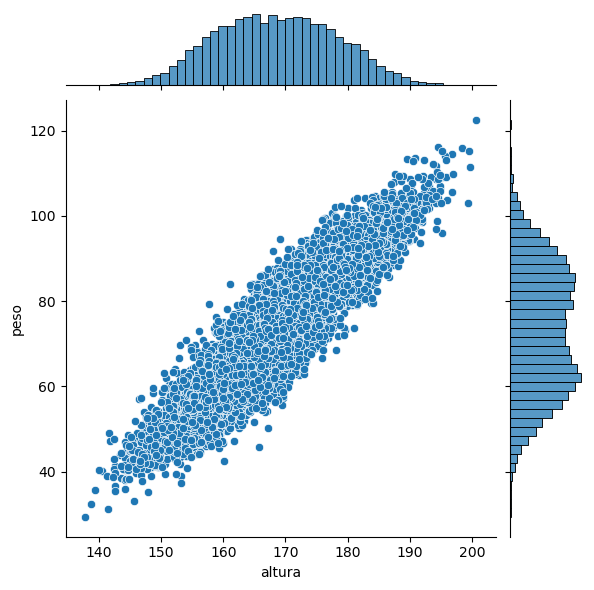

In [ ]:
sns.jointplot(data=df_pa, x="altura", y="peso");

Vamos olhar separadamenter para o sexo...

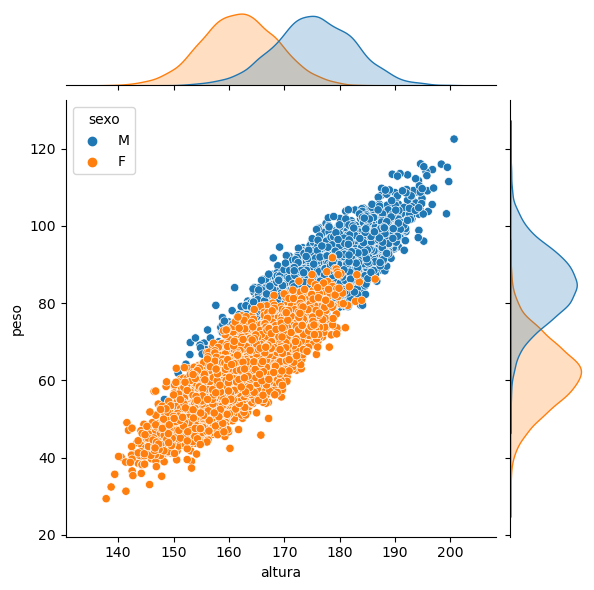

In [ ]:
sns.jointplot(data=df_pa, x="altura", y="peso", hue="sexo");

Aperentemente há uma relação **linear** entre as variáveis!

Vamos dar uma olhada no teste de Pearson:

In [ ]:
df_pa.corr(method="pearson")

,altura,peso
altura,1.000000,0.924759
peso,0.924759,1.000000


In [ ]:
coef, p = scipy.stats.pearsonr(df_pa["peso"], df_pa["altura"])

In [ ]:
p

0.0

Separadamente para os sexos:

In [ ]:
df_pa.groupby("sexo").corr(method="pearson")

altura      peso
sexo                           
F    altura  1.000000  0.849614
     peso    0.849614  1.000000
M    altura  1.000000  0.862980
     peso    0.862980  1.000000

In [ ]:
 scipy.stats.pearsonr(df_pa.query("sexo=='F'")["peso"], df_pa.query("sexo=='F'")["altura"])

PearsonRResult(statistic=0.8496142538260923, pvalue=0.0)

Em ambos os casos (e para todos os dados), obtivemos um coeficiente de pearson bem próxima de 1!

E o p-valor foi 0, isso é: rejeitamos $H_0$, o que implica que as duas amostras **estão correlacionadas linearmente**!

___________

### 1.2) Coeficiente de correlação de Spearman

Este coeficiente indica se as amostras possuem correlação *monotônica*, isso é, **se aumentarmos ou diminuimos uma, a outra irá aumentar ou diminuir**.

O coeficiente varia entre -1 e 1:

> Quanto mais próximo de 1 for o coeficiente, mais positivamente correlacionada as amostras, isso é, se aumentarmos uma, a outra ira aumentar (ou se diminuimos uma, a outra irá diminuir);

> Quanto mais próximo de -1 for o resultado, mais negativamente correlacionada estão as variáveis, isso é, aumentando uma, a outra irá dimunuir (ou se diminuímos uma, a outra irá aumentar).

> Uma correlação de 0 indica ausência de correlação.

**Importante:** o coeficiente de Spearman **não** indica correlação necessariamente linear!

**Suposições:**
 - as observações são idependentes uma das outras e identicamente distribuidas.


 **Interpretação:**
 - $H_0$: as variáveis são independentes; ou
 - $H_1$ as variáveis são monotonicamente dependentes.

Ao analisarmos os valores da base de altura e peso, é natural que tenhamos um coeficiente de Spearman próximo de 1, dado que percebemos claramente uma relação monotônica entre as variáveis:

In [ ]:
df_pa.corr(method="pearson")

,altura,peso
altura,1.000000,0.924759
peso,0.924759,1.000000


In [ ]:
scipy.stats.pearsonr(df_pa["peso"], df_pa["altura"])

PearsonRResult(statistic=0.9247587419983441, pvalue=0.0)

In [ ]:
df_pa.corr(method="spearman")

,altura,peso
altura,1.000000,0.925707
peso,0.925707,1.000000


In [ ]:
scipy.stats.spearmanr(df_pa["peso"], df_pa["altura"])

SpearmanrResult(correlation=0.9257074710044108, pvalue=0.0)

Vamos analisar outra base?

Desta vez, olharemos para uma base com informações relativas a [câncer de mama](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data)

In [ ]:
df_bc = pd.read_csv("breast_cancer.csv")

df_bc

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Claramente parece haver alguma correlação! Vamos ver o que o teste de spearman diz:

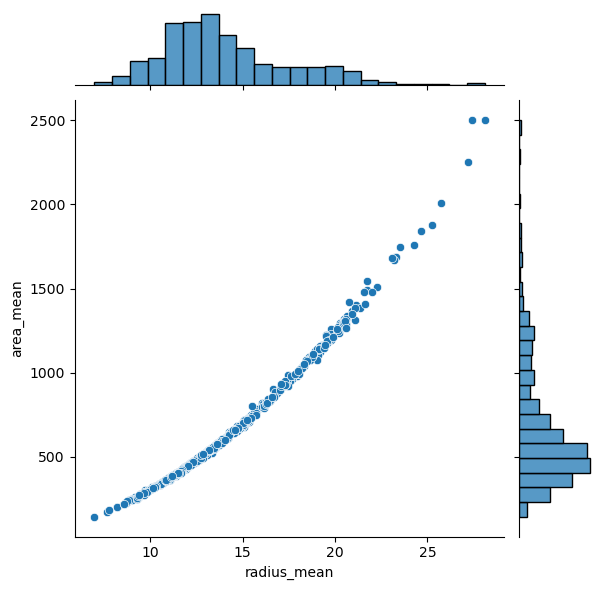

In [ ]:
sns.jointplot(data=df_bc, x="radius_mean", y="area_mean");

In [ ]:
scipy.stats.pearsonr(df_bc["radius_mean"], df_bc["area_mean"])

PearsonRResult(statistic=0.9873571700566124, pvalue=0.0)

In [ ]:
scipy.stats.spearmanr(df_bc["radius_mean"], df_bc["area_mean"])

SpearmanrResult(correlation=0.9996020278067481, pvalue=0.0)

Correlação bem próxima de 1, com p-value 0!

Dessa forma, com um nível de significância de 5%, rejeitamos $H_0$, ou seja, as variáveis **são positivamente monotônicamente dependentes!**

Caso queiramos avaliar a correlação de outras variáveis:

In [ ]:
df_bc.corr(method="pearson")

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [ ]:
df_bc.corr(method="spearman")

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.043740,0.125809,0.043374,0.042829,-0.073225,-0.002247,0.000657,-0.003174,-0.001102,...,0.025451,0.077484,0.026199,0.023137,-0.080853,-0.011300,-0.013284,-0.012798,-0.064977,-0.090637
radius_mean,0.043740,1.000000,0.340956,0.997802,0.999602,0.148510,0.497578,0.645728,0.759702,0.120242,...,0.978604,0.314911,0.971555,0.978863,0.125789,0.491357,0.596043,0.727265,0.174698,0.044564
texture_mean,0.125809,0.340956,1.000000,0.348142,0.344145,0.024649,0.266499,0.342646,0.306891,0.110130,...,0.366547,0.909218,0.375273,0.368335,0.101401,0.290917,0.339725,0.319235,0.120693,0.116144
perimeter_mean,0.043374,0.997802,0.348142,1.000000,0.997068,0.182923,0.543925,0.681958,0.788629,0.150049,...,0.981244,0.323109,0.978980,0.980864,0.156611,0.534565,0.632106,0.757526,0.199007,0.088961
area_mean,0.042829,0.999602,0.344145,0.997068,1.000000,0.138053,0.488988,0.642557,0.755165,0.113928,...,0.979258,0.318178,0.971822,0.980264,0.119712,0.485813,0.593736,0.723390,0.170860,0.038758
smoothness_mean,-0.073225,0.148510,0.024649,0.182923,0.138053,1.000000,0.678806,0.518511,0.565172,0.542228,...,0.203453,0.060645,0.226345,0.191735,0.796085,0.481384,0.429107,0.498868,0.393579,0.511457
compactness_mean,-0.002247,0.497578,0.266499,0.543925,0.488988,0.678806,1.000000,0.896518,0.848295,0.552203,...,0.542626,0.255305,0.592254,0.531590,0.578902,0.901029,0.837921,0.825473,0.450333,0.688986
concavity_mean,0.000657,0.645728,0.342646,0.681958,0.642557,0.518511,0.896518,1.000000,0.927352,0.446793,...,0.682316,0.335866,0.722424,0.676628,0.488775,0.849985,0.938543,0.904938,0.383667,0.541838
concave points_mean,-0.003174,0.759702,0.306891,0.788629,0.755165,0.565172,0.848295,0.927352,1.000000,0.423767,...,0.787411,0.300562,0.813960,0.780395,0.490035,0.758309,0.827281,0.937075,0.355477,0.421110
symmetry_mean,-0.001102,0.120242,0.110130,0.150049,0.113928,0.542228,0.552203,0.446793,0.423767,1.000000,...,0.164552,0.118890,0.190526,0.154462,0.424230,0.440828,0.394481,0.397477,0.710359,0.410069
